### Test de l'installation

In [1]:
import os
os.getcwd()

'/Users/guillaumelaunay/work/communications/lectures/UCBL/5BIM/protéomique/TP/tp-proteomics/notebook'

<IPython.core.display.Javascript object>


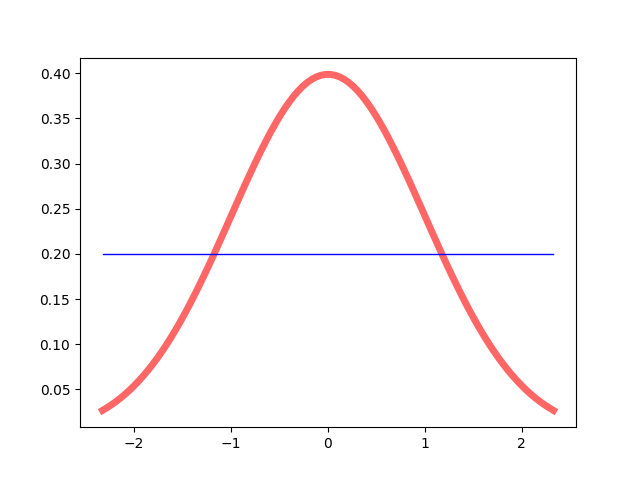

In [3]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

## Lecture XML

In [43]:
from xml.etree.ElementTree import parse, dump
# Parse the E.Coli proteome XML Document
tree = parse('../data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # add more as needed
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
#dump(proteins[0])
# Find the xml subtree of a protein with accession "P31224"
for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text == "P31224":
            dump(entry)
            break

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="1993-07-01" modified="2020-08-12" version="187">
<ns0:accession>P31224</ns0:accession>
<ns0:accession>Q2MBW5</ns0:accession>
<ns0:name>ACRB_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName>Multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName>AcrAB-TolC multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:alternativeName>
<ns0:alternativeName>
<ns0:fullName>Acridine resistance protein B</ns0:fullName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary">acrB</ns0:name>
<ns0:name type="synonym">acrE</ns0:name>
<ns0:name type="ordered locus">b0462</ns0:name>
<ns0:name type="ordered locus">JW0451</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference type="NCBI Taxonomy" id="83333" />
<ns0:lineage>
<ns0:taxon>Bacteria</ns0:taxon>
<ns0:taxon>Proteo

<ns0:begin position="997" />
<ns0:end position="1032" />
</ns0:location>
</ns0:feature>
<ns0:feature type="turn" evidence="12">
<ns0:location>
<ns0:begin position="1033" />
<ns0:end position="1035" />
</ns0:location>
</ns0:feature>
<ns0:feature type="strand" evidence="5">
<ns0:location>
<ns0:begin position="1036" />
<ns0:end position="1038" />
</ns0:location>
</ns0:feature>
<ns0:feature type="strand" evidence="6">
<ns0:location>
<ns0:begin position="1039" />
<ns0:end position="1041" />
</ns0:location>
</ns0:feature>
<ns0:evidence key="1" type="ECO:0000244">
<ns0:source>
<ns0:dbReference type="PDB" id="1T9W" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="2" type="ECO:0000244">
<ns0:source>
<ns0:dbReference type="PDB" id="1T9X" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="3" type="ECO:0000244">
<ns0:source>
<ns0:dbReference type="PDB" id="2DHH" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="4" type="ECO:0000244">
<ns0:source>
<ns0:dbReference type="PDB" id="2DR6" />
</ns

### Lecture TSV python natif

In [4]:
import re
fileIn="../data/TCL_wt1.tsv"
_ = []
header = None

# Any consecutive tab as delimiter
IFS=re.compile("\t+")

#Check if fields "3:6" of current line can be parsed as float
def convert(l):
    try:
        float(l[3])
        float(l[4])
        float(l[5])
        float(l[6])
    except ValueError:
        return False
    except IndexError:
        return False
    return True

# Open file and parse line, setting header line aside
with open(fileIn, "r") as f:
    header = IFS.split( f.readline().rstrip() )
    _ = filter( convert, [ IFS.split(l.rstrip()) for l in f if not '#VALEUR!' in l ] )

# Do actual converion of floats
data=[]
for d in _:
    d[3] = float(d[3])
    d[4] = float(d[4])
    d[5] = float(d[5])
    d[6] = float(d[6])
    data.append(tuple(d))
    
# Sort data by acending abundance ratio
data = sorted(data, key=lambda x:x[4])
print( len(data) )

1746


### Lecture PANDAS
http://www.python-simple.com/python-pandas/lecture-ecriture-fichier.php

    

In [14]:
import pandas
df = pandas.read_csv('../data/TCL_wt1.tsv',sep='\t')
df = df.dropna()
df.shape

(1746, 7)

In [28]:
df = pandas.read_csv('../data/TCL_wt1.tsv',sep='\t')
df = df.dropna()

convert_dtype = {'Accession': str,
                  'Description': str, 
                  'Gene Symbol': str,
                  'Corrected Abundance ratio (1.53)': np.float,
                  'Log2 Corrected Abundance Ratio': np.float,
                  'Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)': np.float,
                  '-LOG10 Adj.P-val': np.float}
df = df.astype(convert_dtype) 
df.shape

(1746, 7)

<IPython.core.display.Javascript object>


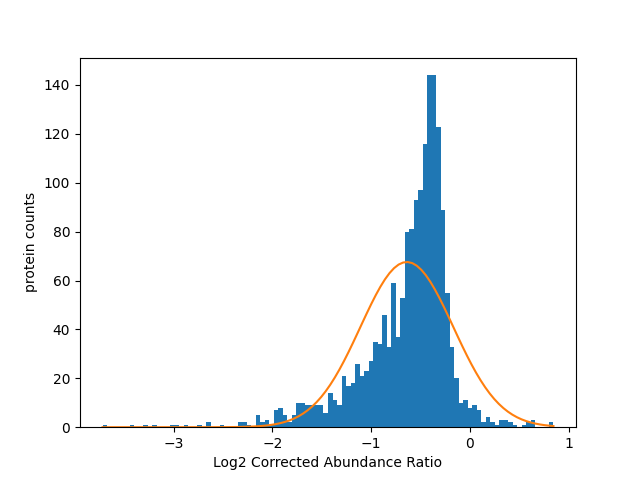

-0.63862621564433 0.22161436206330615


In [32]:
from math import sqrt, pow

field = 'Log2 Corrected Abundance Ratio'
fig, ax = plt.subplots()
_ = df[ field ].tolist()
hist = ax.hist(_, bins=100 )
mu = np.mean(_)
S_2 = (len(_) / (len(_) - 1) ) * pow(np.std(_), 2)
sigma=sqrt(S_2)
print(mu, S_2)

x = np.linspace(min(_), max(_), 100)
dx = hist[1][1] - hist[1][0]
scale = len(_)*dx
ax.plot(x, norm.pdf(x, mu, sigma)*scale)

ax.set_xlabel(field)
ax.set_ylabel('protein counts')

fig.show()

<IPython.core.display.Javascript object>


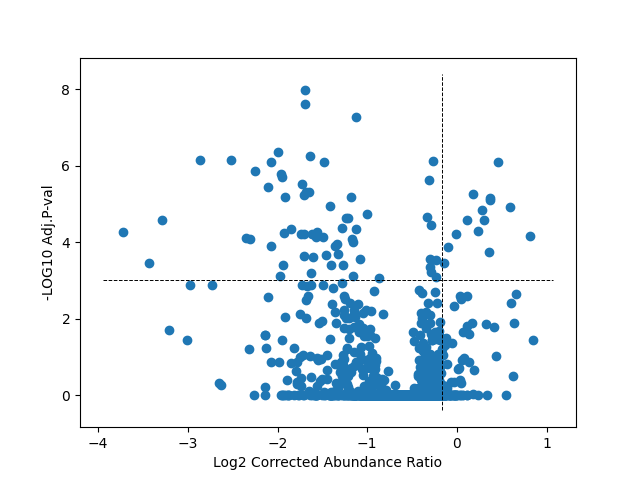

In [34]:
i_thresh =  mu + sigma
j_thresh  =  3 # 0.001

iLabel= 'Log2 Corrected Abundance Ratio'                  
jLabel= '-LOG10 Adj.P-val'
fig, ax = plt.subplots()
ax.scatter(df[ iLabel ].tolist(), df[ jLabel ].tolist(), marker='o')

ax.set_xlabel(iLabel)
ax.set_ylabel(jLabel)
ax.plot(ax.get_xlim(), (j_thresh, j_thresh), color='black',linestyle="dashed", linewidth=0.7)
ax.plot((i_thresh, i_thresh), ax.get_ylim(), color='black',linestyle="dashed", linewidth=0.7)
fig.show()

### Estimating gaussian parameters , then superimposing histogram and PDF

<IPython.core.display.Javascript object>


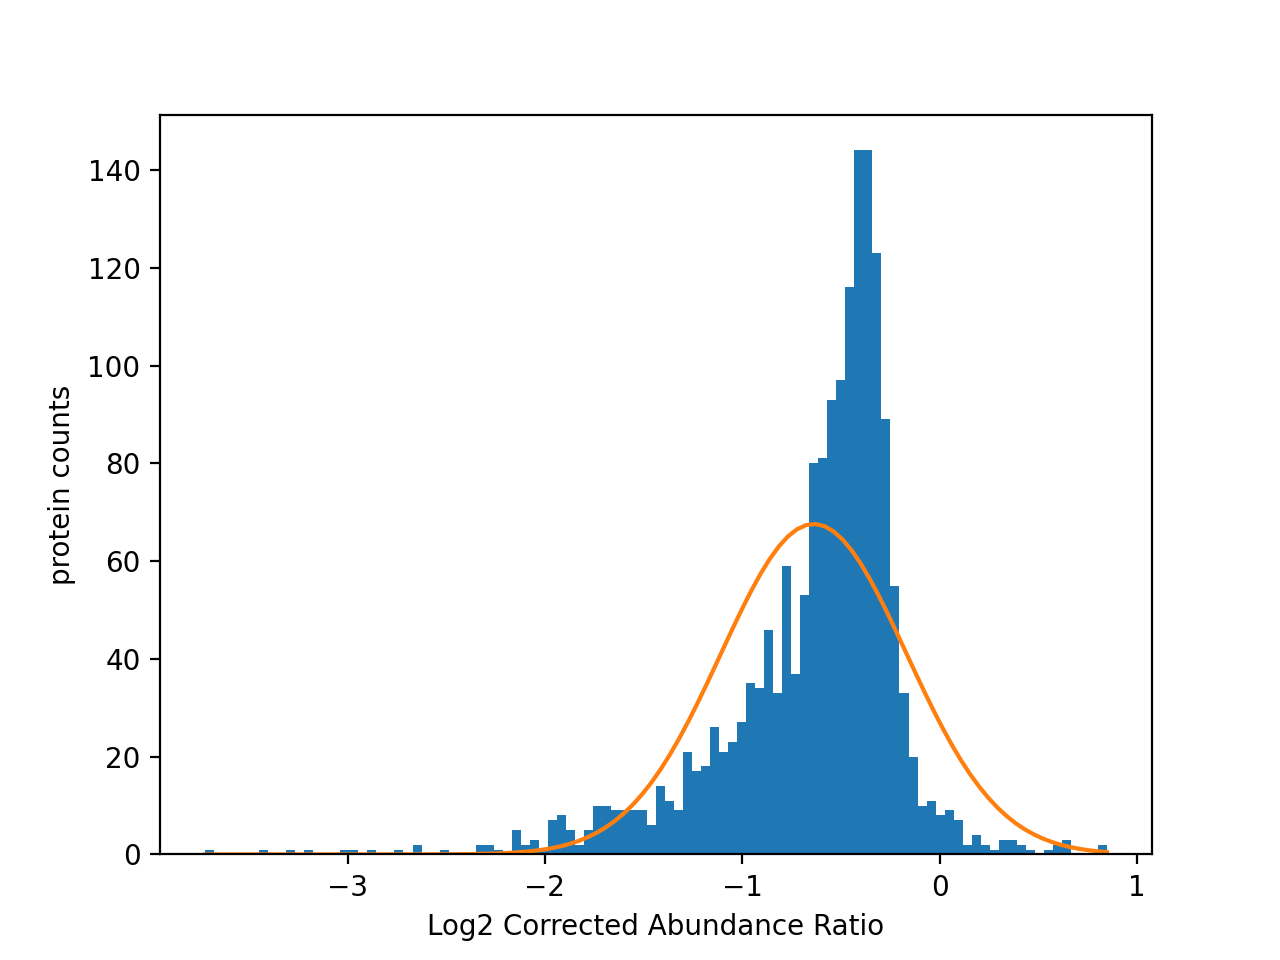

-0.63862621564433 0.22161436206330615


In [20]:
from math import sqrt, pow

fig, ax = plt.subplots()

i = 4
j = 6
_ = [_[i] for _ in data ]

hist = ax.hist(_, bins=100 )
mu = np.mean(_)
S_2 = (len(_) / (len(_) - 1) ) * pow(np.std(_), 2)
sigma=sqrt(S_2)
print(mu, S_2)

x = np.linspace(min(_), max(_), 100)
dx = hist[1][1] - hist[1][0]
scale = len(_)*dx
ax.plot(x, norm.pdf(x, mu, sigma)*scale)

ax.set_xlabel(header[i])
ax.set_ylabel('protein counts')

fig.show()

### Defining overabundant boundaries and represent them on volcano $\text{p_value}=f(FC)$

<IPython.core.display.Javascript object>


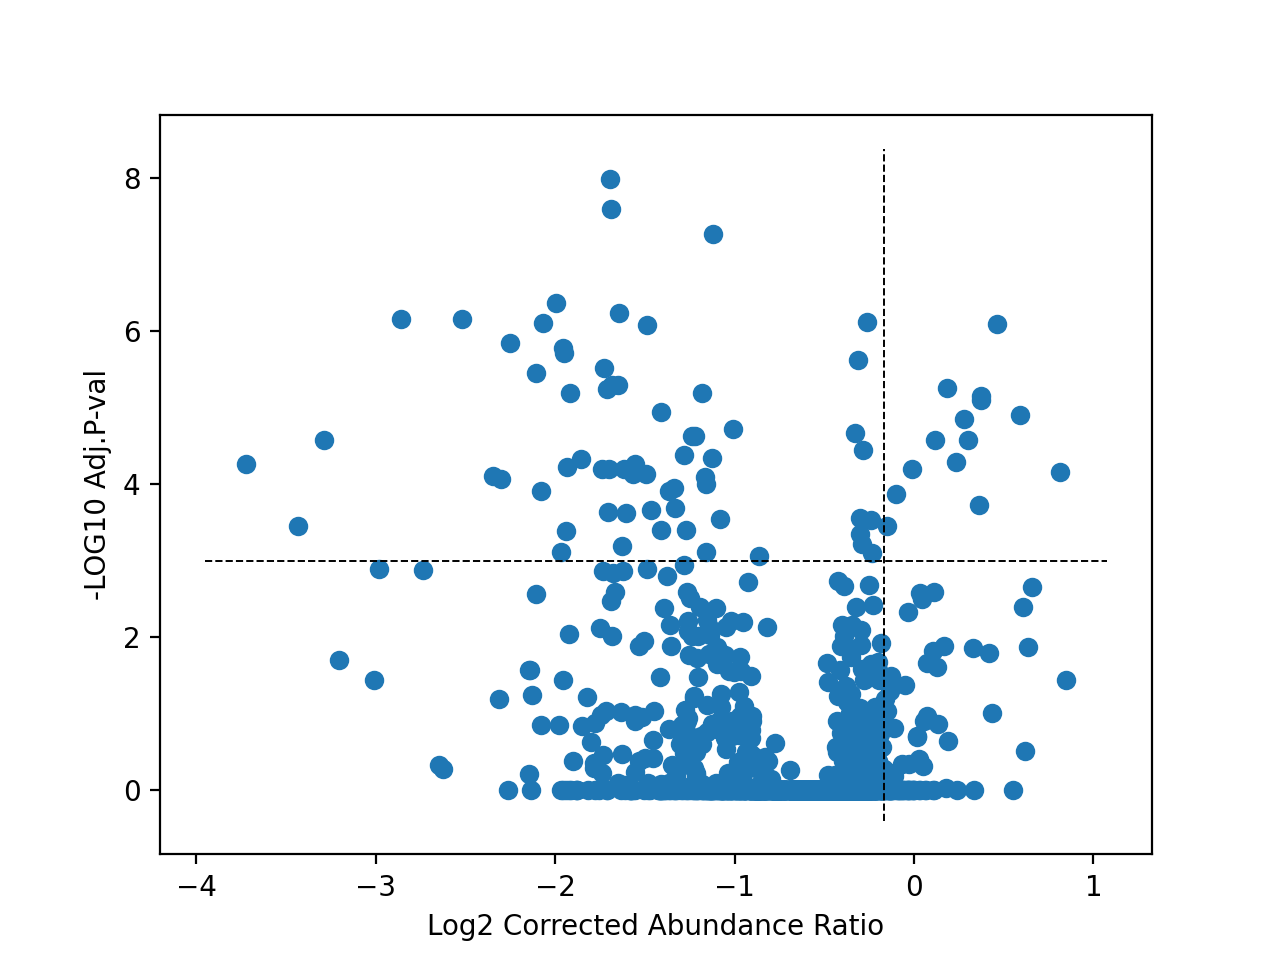

In [22]:
# if native python parsing
i = 4
j = 6
i_thresh =  mu + sigma
j_thresh  =  3 # 0.001

i_thresh = mu + sigma
fig, ax = plt.subplots()
ax.scatter([_[i] for _ in data], [_[j] for _ in data], marker='o')

ax.set_xlabel(header[i])
ax.set_ylabel(header[j])
ax.plot(ax.get_xlim(), (j_thresh, j_thresh), color='black',linestyle="dashed", linewidth=0.7)
ax.plot((i_thresh, i_thresh), ax.get_ylim(), color='black',linestyle="dashed", linewidth=0.7)
fig.show()

In [55]:
goTerms = {
    "GO:0005737" : { "name" : "C:cytoplasm", "count" : 10 }
        ...
    }&


['Accession',
 'Description',
 'Gene Symbol',
 'Corrected Abundance ratio (1.53)',
 'Log2 Corrected Abundance Ratio',
 'Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)',
 'LOG10 Adj.P-val']

#### Retrieve abundant uniprot Accessor 

In [41]:
over_abundant = df.loc[(df['-LOG10 Adj.P-val'] > j_thresh )  & (df['Log2 Corrected Abundance Ratio'] > i_thresh ) ]
uniprotAbundant = over_abundant["Accession"].tolist()
uniprotAbundant

['P0A8V6',
 'P0A9Q1',
 'P02358',
 'P0ACF8',
 'P62399',
 'P0A905',
 'P76506',
 'P13036',
 'P10384',
 'P06971',
 'P0A910',
 'P06996',
 'P76344',
 'P02931']

In [29]:
uniprotAbundant = []
for d in filter(lambda x: x[i] > i_thresh and x[j] > j_thresh , data):
    print(d[0], d[1])
    uniprotAbundant.append(d[0])
    

P0A8V6 Fatty acid metabolism regulator protein OS=Escherichia coli (strain K12) OX=83333 GN=fadR PE=1 SV=2
P0A9Q1 Aerobic respiration control protein ArcA OS=Escherichia coli (strain K12) OX=83333 GN=arcA PE=1 SV=1
P02358 30S ribosomal protein S6 OS=Escherichia coli (strain K12) OX=83333 GN=rpsF PE=1 SV=1
P0ACF8 DNA-binding protein H-NS OS=Escherichia coli (strain K12) OX=83333 GN=hns PE=1 SV=2
P62399 50S ribosomal protein L5 OS=Escherichia coli (strain K12) OX=83333 GN=rplE PE=1 SV=2
P0A905 Outer membrane lipoprotein SlyB OS=Escherichia coli (strain K12) OX=83333 GN=slyB PE=2 SV=1
P76506 Probable phospholipid-binding lipoprotein MlaA OS=Escherichia coli (strain K12) OX=83333 GN=mlaA PE=1 SV=1
P13036 Fe(3+) dicitrate transport protein FecA OS=Escherichia coli (strain K12) OX=83333 GN=fecA PE=1 SV=2
P10384 Long-chain fatty acid transport protein OS=Escherichia coli (strain K12) OX=83333 GN=fadL PE=1 SV=5
P06971 Ferrichrome outer membrane transporter/phage receptor OS=Escherichia coli (s

### Retrieve their set of GO terms name and occurence number

In [73]:
def filterEntries(xmlRoot, pList):
    filteredEntry = []
    ns = '{http://uniprot.org/uniprot}'
    entries = xmlRoot.findall(ns + 'entry')
    for currEntry in entries:
        accessions = currEntry.findall(ns+"accession")
        for currAccesion in accessions:
            if currAccesion.text in pList:
                filteredEntry.append(currEntry)
                
    if not len(filteredEntry) == len(pList):
        raise(f"Uneven list sizes i:{len(pList)} o:{len(filteredEntry)}")
    return filteredEntry

def getGOTerms(xmlEntry, acc):
    ns = '{http://uniprot.org/uniprot}'
    goTerms = xmlEntry.findall(ns +'dbReference[@type="GO"]')
    for goT in goTerms:
        gID   = goT.attrib['id']
        gName = goT.find(ns +'property[@type="term"]').attrib['value']
        if not gID in acc:
            acc[gID] = {"name" : gName, "count" : 0}
        
        acc[gID]['count'] += 1
    return acc
    
tree = parse("../data/uniprot-proteome_UP000000625.xml")
root = tree.getroot()
abundantEntries = filterEntries(root, uniprotAbundant)

goTerms = {}
goTermByProtein = {}
for e, name in zip(abundantEntries, uniprotAbundant):
    goTerms = getGOTerms(e, goTerms)
    goTermByProtein[name] = list(getGOTerms(e, {}).keys())
#print(goTerms)
print(goTermByProtein)


{'P0A8V6': ['GO:0009279', 'GO:0045203', 'GO:0046930', 'GO:0046872', 'GO:0015288', 'GO:0001618', 'GO:0006974', 'GO:0034220', 'GO:0015914', 'GO:0046813'], 'P0A9Q1': ['GO:0005829', 'GO:0030288', 'GO:0046870', 'GO:0046872', 'GO:0008270', 'GO:0071276', 'GO:0070301', 'GO:0034224', 'GO:0006882'], 'P02358': ['GO:0005829', 'GO:0032993', 'GO:0001216', 'GO:0003700', 'GO:0001217', 'GO:0042802', 'GO:0000156', 'GO:0000976', 'GO:0045892', 'GO:0000160', 'GO:0045893', 'GO:0006355'], 'P0ACF8': ['GO:0009279', 'GO:0016021', 'GO:0034702', 'GO:0046930', 'GO:0042912', 'GO:0097718', 'GO:0042802', 'GO:0005216', 'GO:0015075', 'GO:0008289', 'GO:0001530', 'GO:0015288', 'GO:0047485', 'GO:0042910', 'GO:0006855', 'GO:0034220', 'GO:0070207'], 'P62399': ['GO:0005829', 'GO:0022625', 'GO:0008097', 'GO:0003723', 'GO:0003735', 'GO:0000049', 'GO:0000027', 'GO:0006412'], 'P0A905': ['GO:0009279', 'GO:0120010'], 'P76506': ['GO:0009279', 'GO:0016021', 'GO:0016020', 'GO:0019867', 'GO:0046930', 'GO:0042802', 'GO:0015288', 'GO:00

In [ ]:
### Asses pvalue of reported pathway

In [48]:
import json
jsonGoFile = '../data/EColiK12_GOcounts.json'

# K : current go term occurence in total proteome
# k : number of abundant proteins with current go term
# N : proteome size
# n : number of abundant proteins

goStats = {}
with open(jsonGoFile, 'r') as f:
    goStats = json.load(f)

N = goStats['total_proteins']
n = len(uniprotAbundant)

from scipy.stats import hypergeom

results = []
for goID, goDatum in goTerms.items():
    K = goStats['go_terms'][goID]['count']
    k = goTerms[goID]['count']
    #print(N,n,K,k)
    p_value = 1.0 - hypergeom.cdf(k - 1, N, K, n)
    results.append( (goID, goTerms[goID]['name'], p_value, k) )

pathways=sorted(results, key=lambda x:x[2])

In [75]:
# Create the structure to store proteins abundance and pathway information
proteins = df[ ['Log2 Corrected Abundance Ratio', '-LOG10 Adj.P-val', 'Description', 'Accession'] ]
proteinsData = []
for index, row in df.iterrows():
    proteinsData.append( {'x' : row['Log2 Corrected Abundance Ratio'],
                          'y' : row['-LOG10 Adj.P-val'],
                          'name' : row['Accession'],
                          'desc' : row['Description']
                         })
    

with open ('data_scatter.json', "w") as fp:
    json.dump({
        "proteins": proteinsData,
        "pathwayByProtein": goTermByProtein,
        "pathway": pathways
    }, fp, indent=4, sort_keys=True)
    

In [153]:
%%html
<div id="d3-scatter"></div>

In [152]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "https://d3js.org/d3.v6.min.js"}});
require(["d3"], function(d3) {
    //Create SVG element
    var width = 600, height = 300;
    var svg = d3.select("#d3-scatter")
      .append("svg")
      .attr("width", width)
      .attr("height", height);
   

    
    d3.json("data_scatter.json", function(error, dataset) {
         console.log("Allo");
        const margin = 40;
        const xRange =  dataset.proteins.reduce((acc, cv) => {acc.push(cv.x); return acc} , []);
        const yRange =  dataset.proteins.reduce((acc, cv) => {acc.push(cv.y); return acc} , []);
        console.log("Coucou");
        let xScale =  d3.scale.linear()
          .domain([d3.min(xRange), d3.max(xRange)]) // unit: km
          .range([margin, width - margin]); // unit: pixels
    
        let yScale = d3.scale.linear()
         .domain([d3.min(yRange), d3.max(yRange)]) // unit: km
         .range([height - margin, margin]); // unit: pixels
        console.log( yRange)
        console.log(d3.min(yRange), d3.max(yRange))
        
         svg.append("g")
          .attr("transform", "translate(5,50)")      // This controls the vertical position of the Axis
          .call(d3.svg.axis(xScale));
        
        svg.selectAll("circle") 
          .data(dataset.proteins)
          .enter()
          .append("circle") 
          .attr('r', 5)
          .attr('cx', (d) => xScale(d.x) )
          .attr('cy', (d) => yScale(d.y) )
          .style("fill", "steelblue")
        
        
       //   .each(d => console.log(d))
    });
});

<IPython.core.display.Javascript object>

### Compute Global GO statistics

In [94]:
from os import listdir
from os.path import isfile, join
myPath = "..//data/K12_proteome"
XfileList = [join(myPath, f) for f in listdir(myPath) if isfile(join(myPath, f))]

In [36]:
import json
jsonOutFile = '../data/EColiK12_GOcounts.json'

tree = parse("../data/uniprot-proteome_UP000000625.xml")
xmlRoot = tree.getroot()
ns = '{http://uniprot.org/uniprot}'
entries = xmlRoot.findall(ns + 'entry')

K12_goTerms = {}
for e in entries:
    K12_goTerms = getGOTerms(e, K12_goTerms)

In [37]:
print( len(K12_goTerms.keys()), " go terms found" )
data = { "specie" : "E.Coli K12", "total_proteins" : 4391, "go_terms" : K12_goTerms}
with open (jsonOutFile, "w") as f:
    json.dump(data, f, indent=2, sort_keys=True)

3901  go terms found
